### Problem Description

We're providied with the dataset containing SMS text each labeled with 0 (i.e. ham), meaning a regular message, or 1 - which signifies spam. We want to perform NLP and build a model using Naive Bayes which would classify each new SMS text as ham/regular or spam message. 

### The Approach

The project consists of the following steps:

1. Importing and exploring the data

2. Preprocessing data by additionally cleaning it and count-vectorizing the texts

3. Training and evaluating the Naive Bayes based models

4. Processing texts using a TF-IDF vectorization, and training/evaluating Multinomial NB model on such processed texts

### Importing and Exploring the Data

First, we'll import and check the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
example = data.iloc[103]['text']
example

'Subject: sshs . . get low cost software cds or download !  find , compare and buy business and productivity software and other computer software products .  http : / / uga . 07 mx 3 hitfsopxj 0 . socagefh . com  intellectual passion dries out sensuality .  only actions give life strength ; only moderation gives it a charm .'

We see that data here is pretty clean and that even the punctuation is separated from the words. Now let's see what the ratio between the spam and the ham messages.

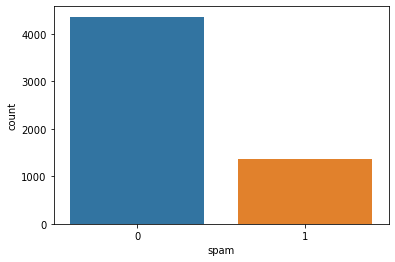

In [7]:
sns.countplot(data['spam']);

In [8]:
ham_perc = len(data[data['spam'] == 0])/len(data)
ham_perc = round(ham_perc*100, 2)
print(f'Ham percent: {ham_perc}%')

Ham percent: 76.12%


In [9]:
spam_perc = len(data[data['spam'] == 1])/len(data)
spam_perc = round(spam_perc*100, 2)
print(f'Spam pecent: {spam_perc}%')

Spam pecent: 23.88%


We see that ham, i.e. the real messages are predominant, and that we have an imbalanced dataset at hand.

### Data Preprocessing


Before training our model we need to clean the texts even further. We'll remove the punctuation and the stopwords, i.e. words that appear very often in english language, and can bring bias to our model. After that we'll fit `Count Vectorizer` to our vocabulary in order to vectorize the texts and make them usable for model training.

In [10]:
import string
from nltk.corpus import stopwords

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
#removing the punctuation
example_char = [char for char in example if char not in string.punctuation]
example = ''.join(example_char)
example

'Subject sshs   get low cost software cds or download   find  compare and buy business and productivity software and other computer software products   http    uga  07 mx 3 hitfsopxj 0  socagefh  com  intellectual passion dries out sensuality   only actions give life strength  only moderation gives it a charm '

In [12]:
#removing the stopwords
example_clean = [word for word in example.split() if word.lower() not in stopwords.words('english')]
example_clean = ' '.join(example_clean)
example_clean

'Subject sshs get low cost software cds download find compare buy business productivity software computer software products http uga 07 mx 3 hitfsopxj 0 socagefh com intellectual passion dries sensuality actions give life strength moderation gives charm'

In [13]:
def text_cleaner(text):
    
    '''Cleaning the text of the punctuation and stop words'''
    
    #removing the punctuation
    text_char = [char for char in text if char not in string.punctuation]
    text = ''.join(text_char)
    
    #removing the stopwords
    clean_text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return clean_text

Before the vectorization we will split the dataset into the train and test set, since we need to see how our model also copes with the words it sees for the first time, and hasn't been able to vectorize. We'll also use stratification in order to combat the dataset imbalance.

In [14]:
X = data['text']
y = data['spam']

In [23]:
#splitting into train and test set
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   stratify = y,
                                                   random_state = 82)
X_train.shape, X_test.shape

((4582,), (1146,))

In [24]:
#count-vectorizing the train/test sets
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = text_cleaner)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### Training the Model

We will now use the Naive Bayes to make ham/spam classifiers. We will create and compare two models: Multinomial and Gaussian Naive Bayes. Multinomial NB actually corresponds better for word models, but we'll try out the Gaussian NB as well.

In [25]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [26]:
#implementing Multinomial NB
from sklearn.naive_bayes import MultinomialNB

multi_nb_classifier = MultinomialNB()
multi_nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
#implementing Gaussian NB
from sklearn.naive_bayes import GaussianNB

gauss_nb_classifier = GaussianNB()
gauss_nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Evaluating the Model

Now we compare performances of the two models. 

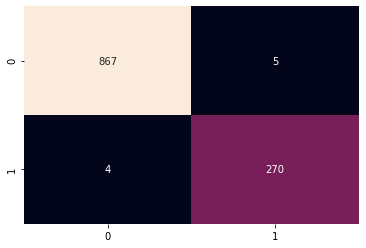

In [28]:
#evaluating the Multinomial NB
from sklearn.metrics import confusion_matrix, classification_report

y_pred_multi = multi_nb_classifier.predict(X_test)

cm_multi = confusion_matrix(y_test, y_pred_multi)
sns.heatmap(cm_multi, annot = True, cbar = False, fmt = '.0f');

In [29]:
print(classification_report(y_test, y_pred_multi))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.98      0.99      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



The results show that the model is performing extremly well on the test set: only 9 messages were missclassified out of 1146, which is means that our model performed with almost 99.9% accuracy on the test set. More importanly in this case, our model also performed with the great precision of 99.3%. This means that it will make very little Type II errors (i.e. False Positives). We don't want these types of errors since they mean that an important mail might be classified as as a spam.

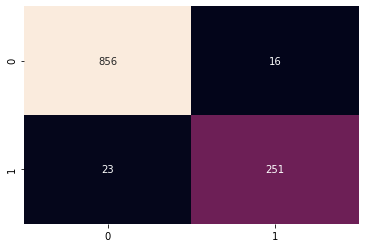

In [30]:
#evaluating the Gaussian NB
y_pred_gauss = gauss_nb_classifier.predict(X_test)

cm_gauss = confusion_matrix(y_test, y_pred_gauss)
sns.heatmap(cm_gauss, annot=True, cbar=False, fmt = '.0f');

In [31]:
print(classification_report(y_test, y_pred_gauss))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       872
           1       0.94      0.92      0.93       274

    accuracy                           0.97      1146
   macro avg       0.96      0.95      0.95      1146
weighted avg       0.97      0.97      0.97      1146



We see that Gaussian NB performs poorly than Multinomial NB with 96.6% accuracy. This confirms our statement from before that, when building word models, it's much better to use the Multinomial NB.

### TF-IDF Vectorizer

TF-IDF vectorizer is a another way of vectorizing the text. It gives each word in each document a weight which depends how often a word appears in the given document and across all the document. If a word appears too many times in many documents, then it will actually have lower weight. In order to have a high weight, a certain word has to appear many times, but only across several documents.

In [32]:
#converting the word-count vectors with tf-idf transformer
from sklearn.feature_extraction.text import TfidfTransformer


tdf = TfidfTransformer()

X_train_tdf = tdf.fit_transform(X_train)
X_train_tdf = X_train_tdf.toarray()
X_test_tdf = tdf.transform(X_test)
X_test_tdf = X_test_tdf.toarray()

In [33]:
#implementing the Multinomial NB on tf-idf vectors
multi_nb_classifier_tdf = MultinomialNB()
multi_nb_classifier_tdf.fit(X_train_tdf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

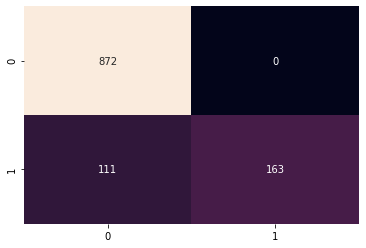

In [35]:
#evaluating the model
y_pred_multi_tdf = multi_nb_classifier_tdf.predict(X_test_tdf)

cm_multi_tdf = confusion_matrix(y_test, y_pred_multi_tdf)
sns.heatmap(cm_multi_tdf, annot = True, cbar = False, fmt = '.0f');

In [36]:
print(classification_report(y_test, y_pred_multi_tdf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       872
           1       1.00      0.59      0.75       274

    accuracy                           0.90      1146
   macro avg       0.94      0.80      0.84      1146
weighted avg       0.91      0.90      0.89      1146



Here we observe a substantial drop in the accuracy (to 90.3%). However, in this case we completely avoid false positives, as we have 100% precision. If we are ready to sacrfice good portion of accuracy, but to make sure we never make any Type II error, then we should actually use this model. This means that we might get annoyed by spam messages in our inbox a bit more often, but an importan message will (almost) never end up in the spam.

### Conclusions

By cleaning up the SMS texts from the stopwords, battling the dataset imbalance by using the stratification and count-vectorizing the appearance of each word in each text, we have managed to build extremely precize ham/spam classification model using Multinomial Naive Bayes. Furthermore, by implementing tf-idf vectorization and adding weight to each word, we have managed to build a model that is much less accurate, but will (almost) never mistake a regular message for a spam. 